In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
# load dataset
data_folder = './Data/'
uscovid = pd.read_csv(data_folder+'us-states.csv')
usvacc  = pd.read_csv(data_folder+'us_state_vaccinations.csv')

## 0. Dataset preparation

In [3]:
# drop duplicates
usvacc.drop_duplicates()
uscovid.drop_duplicates()

# remove US level rows
usvacc.drop(usvacc.loc[usvacc['location']=='United States'].index, inplace=True) 

# keep only Continental United States rows
uscovid=uscovid.loc[uscovid['state'].isin(['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
                                  'Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky',
                                   'Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi',
                                  'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
                                  'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania',
                                  'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
                                  'Virginia','Washington','West Virginia','Wisconsin','Wyoming'])]
usvacc=usvacc.loc[usvacc['location'].isin(['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
                                  'Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky',
                                   'Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi',
                                  'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
                                  'New York State','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania',
                                  'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
                                  'Virginia','Washington','West Virginia','Wisconsin','Wyoming'])]

# choose the same time range for two dataset
# check the earliest date
print('The earliest date is',max(usvacc['date'].min(),uscovid['date'].min()))
print('The latest date is',min(usvacc['date'].max(),uscovid['date'].max()))
uscovid_clipped = uscovid.query("date >= '2021-01-12' and date <='2022-04-05'")

# merge two dataset into one
usvacc=usvacc.rename(columns={'location':'state'})
usvacc.replace('New York State','New York',inplace=True)
df=pd.merge(uscovid_clipped,usvacc, on=['date','state'])

The earliest date is 2021-01-12
The latest date is 2022-04-05


In [4]:
# check basic info of the new dataframe
df

,date,state,fips,cases,deaths,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,1,407848,5573,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-12,Alaska,2,50243,216,35838.0,141600.0,22486.0,0.74,4.90,5400.0,3.07,19.36,NaN,NaN,NaN,0.253,NaN,NaN
2,2021-01-12,Arizona,4,638739,10537,141355.0,563025.0,95141.0,0.11,1.94,8343.0,1.31,7.74,NaN,NaN,NaN,0.251,NaN,NaN
3,2021-01-12,Arkansas,5,259553,4121,40879.0,274400.0,39357.0,0.00,1.35,8.0,1.30,9.09,NaN,NaN,NaN,0.149,NaN,NaN
4,2021-01-12,California,6,2816366,31105,816301.0,3286050.0,703540.0,0.25,2.07,100089.0,1.78,8.32,NaN,NaN,NaN,0.248,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22445,2022-04-05,Virginia,51,1672450,19754,16131710.0,19152185.0,7264841.0,72.65,189.00,6201153.0,85.11,224.38,9542.0,10259.0,1202.0,0.842,2896161.0,33.93
22446,2022-04-05,Washington,53,1459312,12573,14109436.0,17277395.0,6120386.0,72.16,185.29,5494970.0,80.37,226.89,38755.0,10602.0,1392.0,0.817,2830616.0,37.17
22447,2022-04-05,West Virginia,54,498128,6716,2670699.0,3955545.0,1158997.0,57.25,149.02,1025965.0,64.67,220.72,6520.0,1655.0,923.0,0.675,462728.0,25.82
22448,2022-04-05,Wisconsin,55,1587490,14334,10008962.0,11261145.0,4162469.0,65.15,171.90,3793153.0,71.49,193.41,2988.0,5285.0,908.0,0.889,2106417.0,36.18


## 1. Basic statistics

In [5]:
df.describe()

,fips,cases,deaths,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
count,22450.000000,2.245000e+04,22450.000000,2.028800e+04,2.028800e+04,2.028000e+04,20229.000000,20288.000000,2.022900e+04,20280.000000,20288.000000,19507.000000,22400.000000,22400.000000,20288.000000,7.063000e+03,7063.000000
mean,29.320000,8.872172e+05,13595.256659,6.528894e+06,8.077828e+06,3.409130e+06,42.697389,99.208551,2.798073e+06,51.573588,123.274355,25409.445327,24284.553348,3633.818527,0.789229,1.308924e+06,20.768443
std,15.623971,1.101629e+06,16007.022332,8.909799e+06,1.084712e+07,4.513322e+06,21.021875,49.616750,3.785709e+06,22.091532,60.246352,43755.725597,37162.017843,2657.848577,0.091467,1.715825e+06,10.147379
min,1.000000,9.247000e+03,158.000000,1.646700e+04,4.780000e+04,1.161500e+04,0.000000,1.350000,5.000000e+00,0.800000,6.140000,0.000000,0.000000,0.000000,0.149000,1.116500e+04,0.820000
25%,17.000000,2.335998e+05,2792.000000,1.353856e+06,1.731186e+06,7.713825e+05,29.370000,67.060000,5.501840e+05,38.837500,86.762500,3223.000000,4723.000000,1756.750000,0.759000,3.232175e+05,12.795000
50%,29.500000,5.456270e+05,8273.000000,3.584194e+06,4.490800e+06,1.954880e+06,48.030000,103.385000,1.554171e+06,55.870000,125.505000,10906.000000,11995.500000,2880.000000,0.801000,7.247270e+05,20.880000
75%,42.000000,1.043722e+06,17386.000000,8.221819e+06,1.005908e+07,4.123331e+06,57.880000,134.912500,3.553192e+06,66.770000,169.842500,29150.000000,28147.250000,4865.250000,0.846000,1.629322e+06,27.960000
max,56.000000,9.117579e+06,89240.000000,7.294306e+07,8.776496e+07,3.264786e+07,81.740000,218.850000,2.813423e+07,97.630000,278.780000,937509.000000,494575.000000,22621.000000,1.027000,1.400684e+07,48.050000


Text(0, 0.5, 'Count')

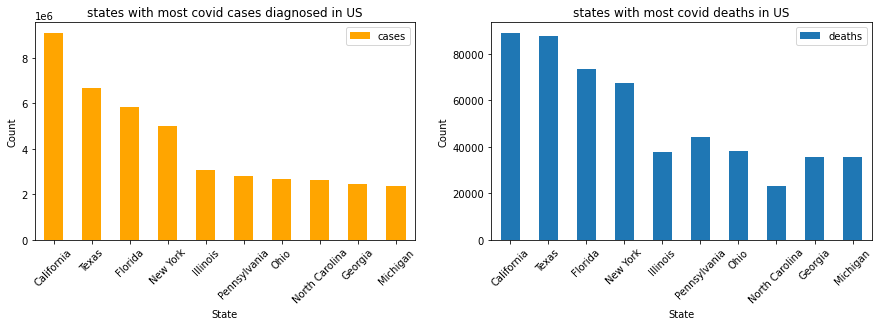

In [6]:
# top 10 states with most cases and death in total by 2022-04-05

top_state=df[df['date']=='2022-04-05'].sort_values(by=['cases','deaths'], ascending=(False,False))
top10=top_state.iloc[:10]

# plot
fig, ax = plt.subplots(ncols=2, figsize=(15,4))

top10.plot(ax=ax[0],x="state", y="cases",kind = 'bar',color='orange')
ax[0].set_xticklabels(top10['state'],rotation=45)
ax[0].set_title("states with most covid cases diagnosed in US")
ax[0].set_xlabel('State')
ax[0].set_ylabel('Count')

top10.plot(ax=ax[1],x="state", y="deaths",kind = 'bar')
ax[1].set_xticklabels(top10['state'],rotation=45)
ax[1].set_title("states with most covid deaths in US")
ax[1].set_xlabel('State')
ax[1].set_ylabel('Count')

Text(0.5, 1.0, 'covid cases from 2021-01-12 to 2022-04-05')

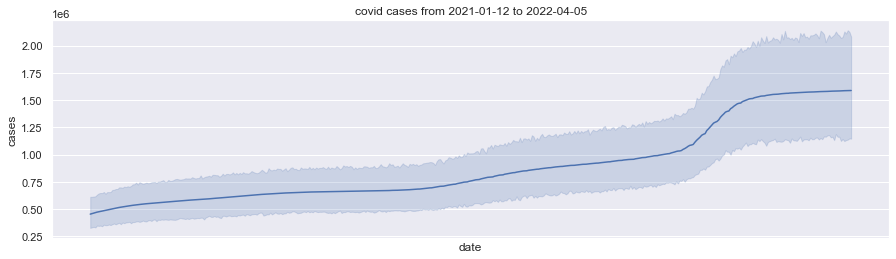

In [7]:
# covid cases and deaths from 2021-01-12 to 2022-04-05

sns.set(rc={'figure.figsize':(15,4)})
p = sns.lineplot(x='date',y='cases',data=df)
p.set_xticks([])
p.set_title('covid cases from 2021-01-12 to 2022-04-05')

Text(0.5, 1.0, 'covid deaths from 2021-01-12 to 2022-04-05')

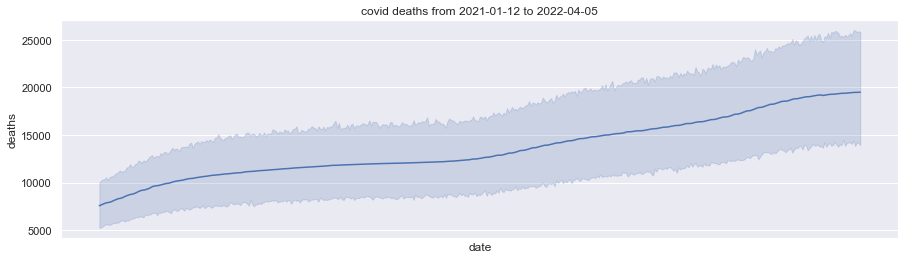

In [8]:
sns.set(rc={'figure.figsize':(15,4)})
p = sns.lineplot(x='date',y='deaths',data=df)
p.set_xticks([])
p.set_title('covid deaths from 2021-01-12 to 2022-04-05')

Text(0.5, 1.0, 'total vaccination distribution')

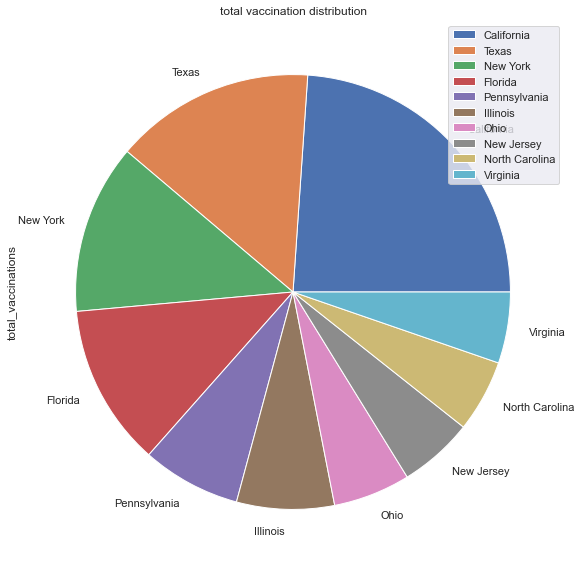

In [54]:
# total vaccination distribution
top_vacc=df[df['date']=='2022-04-05'].sort_values(by=['total_vaccinations'], ascending=False).iloc[:10]
top_vacc.set_index('state', inplace=True)
top_vacc.plot.pie( y="total_vaccinations",figsize=(10, 10))
plt.title('total vaccination distribution')